Randomised Reponse

1. Produce bc with BC.py

1.1 Generate Boolean Circuits from BcSequence Class, which contains getbc() function to return the context of generated bc. 
BcSequence requires a argument, a list contain bc information, like [0,1,0] represents \n

x->or and or ...-|
				|->Not()->>
x->and or and...-|

return of getbc() is used to find solution of lying, hence it contain a constrain of y!=x. here x is input and y is the output.

In [3]:
from BooleanCircuit.BC import BcSequence

bcSequence = BcSequence([0, 1, 0])
bc = bcSequence.getbc()
print(bc)

(If(x == False,
   Not(Or(And(Or(x, r0), r1), r2)),
   Not(And(Or(And(x, r0), r1), r2))) ==
y, y != x)


2. Produce output with input and randomizer.

2.1 get epsilon and calculate the length of bc. 
BcSequence contain a function to return result with input and random group.
here randomizer

In [3]:
from z3 import *
from randomize import Randomize

input = '111000111'
value = [int(i) for i in list(input)]

# epsilon of differential privacy
epsilon = math.exp(math.log(7))

length_of_bc = math.log(epsilon + 1, 2)
randomizer = Randomize(int(length_of_bc))

# puer or chain satisfy 1/e^epsilon+1 probability of lying 
seq = []

for i in range(int(length_of_bc)):
    seq.append(0)

bcSequence = BcSequence(seq)
randomized_result = bcSequence.get_outputs(value, randomizer)

print bcSequence.get_out_bc()
print "Randomized result:"
print randomized_result

transform_result = []
for i in randomized_result:
    transform_result.append(bcSequence.transform_bool(i))
    
print transform_result

[x = True, r2 = True, r1 = True, r0 = False, y = True]
[x = True, r2 = True, r1 = False, r0 = True, y = True]
[x = True, r2 = False, r1 = True, r0 = True, y = True]
[x = False, r2 = True, r1 = False, r0 = False, y = False]
[x = False, r2 = True, r1 = False, r0 = True, y = False]
[x = False, r2 = False, r1 = False, r0 = True, y = False]


[x = True, r2 = True, r1 = True, r0 = True, y = False]
[x = True, r2 = False, r1 = False, r0 = True, y = True]
[x = True, r2 = True, r1 = True, r0 = True, y = False]
If(x == False,
   Not(Or(Or(Or(x, r0), r1), r2)),
   Not(And(And(And(x, r0), r1), r2))) ==
y
Randomized result:
[True, True, True, False, False, False, False, True, False]
[1, 1, 1, 0, 0, 0, 0, 1, 0]


In [2]:
from randomize import Randomize

randomizer = Randomize(3)
print randomizer.get_random_seq()

[0, 1, 0]


In [7]:
bc = bcSequence.getbc()
print bc

bcSequence.find_solution(bc)
pro = bcSequence.find_probability()
print pro

cal_e_epsilon = bcSequence.find_epsilon()
print cal_e_epsilon

(If(x == False,
   Not(Or(Or(Or(x, r0), r1), r2)),
   Not(And(And(And(x, r0), r1), r2))) ==
y, y != x)
start search
finished search solution
1
0.125
7.0


In [8]:
%matplotlib inline


##4. get plots for different situations.
like the find probability in differnt numbers of AND gate in the same length (n gate in length of 100).
To shorten the time of finding the solution, here just find the solution when input is 1 (True). Solutions are all possible combination of random group to make bc lie

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


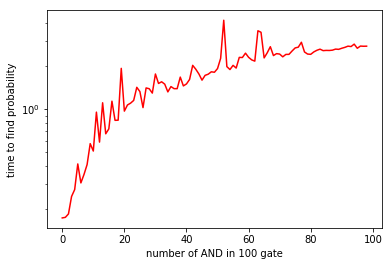

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from BooleanCircuit.BC import BcSequence
x_data1 = []
y_data1 = []
y_data2 = []

# inital pure chain first
seq1 = [0 for i in range(100)]
print seq1

bcSequence1 = BcSequence(seq1)
t_bc1 = bcSequence1.get_t_bc()
bcSequence1.find_solution(t_bc1)

x_data1.append(0)
y_data1.append(bcSequence1.gettime())
y_data2.append(bcSequence1.find_probability())

for i in range(98):
    seq1[i + 1] = 1
    bcSequence1 = BcSequence(seq1)
    t_bc1 = bcSequence1.get_t_bc()
    bcSequence1.find_solution(t_bc1)
    x_data1.append(i + 1)
    y_data1.append(bcSequence1.gettime())
    y_data2.append(float(bcSequence1.find_probability()))
    
plt.plot(x_data1, y_data1, 'r')
plt.yscale('log')
plt.ylabel('time to find probability')
plt.xlabel('number of AND in 100 gate')

plt.show()

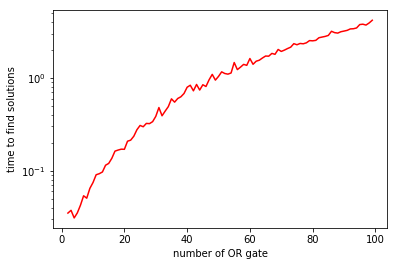

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from BooleanCircuit.BC import BcSequence
seq = [0, 0]

x_data = []
y_data = []

for i in range(98):
    for j in range(i):
        seq.append(0)
    bcSequence = BcSequence(seq)
    bc = bcSequence.getbc()
    bcSequence.find_solution(bc)
    x_data.append(i + 2)
    y_data.append(bcSequence.gettime())

plt.plot(x_data, y_data, 'r')
plt.yscale('log')
plt.ylabel('time to find solutions')
plt.xlabel('number of OR gate')
plt.show()